# 4. Time Series Analysis

## Ziele dieser Übung
- Wie kann ich mir schnell einen Überblick über den Datensatz verschaffen?
- Wie kann ich mir die Korrelation zwischen den Variablen ausgeben lassen?
- Wie kann ich in Python Zeitreihen plotten? 
- Wie kann ich saisonale Einflüsse untersuchen und in Plots darstellen?
- Wie kann ich die Plots exportieren?

In [1]:
# Paket pandas einbinden
import pandas as pd

## Daten einlesen und vorbereiten

In [2]:
# Daten einlesen über pandas Funktion read_csv()
raw_data = pd.read_csv('./data/germany_daily.csv')

# Die Daten sind nun in einem pandas data frame gespeichert. 
# Geben Sie sich die Anzahl der Zeilen und Spalten des data frames aus
raw_data.shape

(4383, 5)

In [3]:
# Lassen Sie sich die ersten 8 Zeilen der Rohdaten ausgeben
raw_data.head(8)

Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN
5  2006-01-06     1403.427   NaN    NaN         NaN
6  2006-01-07     1300.287   NaN    NaN         NaN
7  2006-01-08     1207.985   NaN    NaN         NaN

In [4]:
# Lassen Sie sich die letzten 5 Zeilen der Rohdaten ausgeben
raw_data.tail(5)

Date  Consumption     Wind   Solar  Wind+Solar
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

In [5]:
# Lassen Sie sich die Datentypen der Spalten ausgeben
raw_data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [6]:
# Ersten Überblick über den Datensatz verschaffen, funktioniert mit der Funktion describe()
raw_data.describe().round(3)

Consumption      Wind     Solar  Wind+Solar
count     4383.000  2920.000  2188.000    2187.000
mean      1338.676   164.814    89.259     272.663
std        165.776   143.693    58.550     146.320
min        842.395     5.757     1.968      21.478
25%       1217.859    62.353    35.179     172.186
50%       1367.123   119.098    86.407     240.991
75%       1457.761   217.900   135.072     338.988
max       1709.568   826.278   241.580     851.556

In [7]:
# Überprüfen Sie den Datensatz auf NaN - Wie viele NaN sind in den einzelnen Spalten enthalten?
raw_data.isna().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [8]:
# Zeilen mit mindestens 1x NaN verwerfen. Hierfür vorher eine Kopie der Rohdaten mit copy() anlegen. 
# Zeilen mit mindestens 1x NaN verwerfen funktioniert mit dropna, dabei auf die Angabe von inplace achten.
data = raw_data.copy()
data.dropna(inplace=True)

In [9]:
# Überprüfen durch erneute Ausgabe der NaNs in den Spalten
data.isna().sum()

Date           0
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
dtype: int64

In [10]:
# Datumsspalte ist noch nicht im richtigen Format. 
# Soll als Zeitstempel erkannt werden. 
# Das funktioniert über die pandas Funktion to_datetime()
# Dafür die passende Spalte aus dem Dataframe auswählen und anschließend die to_datetime() auf die Spalte anwenden
data['Date'] = pd.to_datetime(data['Date'])

# Überprüfung der Datentypen
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [11]:
# Der Zeitstempel soll nun als Index des data frames gesetzt werden
data.set_index('Date', inplace=True)

In [12]:
# Wir können auf einfache Art weitere Spalten mit dem Jahr, Monat oder Tag hinzufügen
# Hierzu greifen wir auf die entsprechenden Attribute des datetime index zu 
data['Year'] = data.index.year
data.head()

Consumption     Wind   Solar  Wind+Solar  Year
Date                                                      
2012-01-01      948.128  227.465   6.587     234.052  2012
2012-01-02     1269.581  207.327   6.574     213.901  2012
2012-01-03     1334.745  473.468  24.679     498.147  2012
2012-01-04     1347.136  499.804  14.681     514.485  2012
2012-01-05     1376.658  523.851   5.071     528.922  2012

In [13]:
# Fügen Sie weitere Spalten mit dem Wochentag und Monat hinzu.
# Der Wochentag entspricht dem Attribut weekday des index, der Monat dem Attribut month

# Wochentag durchnummeriert von 0-6 (Mo-So)
data['Weekday'] = data.index.weekday

# Monat durchnummeriert von 1-12
data['Month'] = data.index.month

# Ausgabe der ersten Zeilen
data.head()

Consumption     Wind   Solar  Wind+Solar  Year  Weekday  Month
Date                                                                      
2012-01-01      948.128  227.465   6.587     234.052  2012        6      1
2012-01-02     1269.581  207.327   6.574     213.901  2012        0      1
2012-01-03     1334.745  473.468  24.679     498.147  2012        1      1
2012-01-04     1347.136  499.804  14.681     514.485  2012        2      1
2012-01-05     1376.658  523.851   5.071     528.922  2012        3      1

In [14]:
# Wochenenden
data['Weekend'] = data['Weekday'] >= 5

# Name des Wochentags (Monday, Tuesday, ...)
# Achtung, hier ist day_name() eine Funktion, die den Namen zurückgibt 
# und nicht wie oben ein Attribut von index
data['Weekday Name'] = data.index.day_name()

# Monatsname (January, February, ...)
# Achtung, hier ist month_name() eine Funktion, die den Monatsnamen zurückgibt 
# und nicht wie oben ein Attribut von index
data['Month Name'] = data.index.month_name() 

data.head()

Consumption     Wind   Solar  Wind+Solar  Year  Weekday  Month  \
Date                                                                         
2012-01-01      948.128  227.465   6.587     234.052  2012        6      1   
2012-01-02     1269.581  207.327   6.574     213.901  2012        0      1   
2012-01-03     1334.745  473.468  24.679     498.147  2012        1      1   
2012-01-04     1347.136  499.804  14.681     514.485  2012        2      1   
2012-01-05     1376.658  523.851   5.071     528.922  2012        3      1   

            Weekend Weekday Name Month Name  
Date                                         
2012-01-01     True       Sunday    January  
2012-01-02    False       Monday    January  
2012-01-03    False      Tuesday    January  
2012-01-04    False    Wednesday    January  
2012-01-05    False     Thursday    January

In [15]:
# Korrelationsmatrix ausgeben
num_data = data.select_dtypes(include=['float64'])
num_data.corr()

Consumption      Wind     Solar  Wind+Solar
Consumption     1.000000  0.133076 -0.279543    0.027648
Wind            0.133076  1.000000 -0.308832    0.924745
Solar          -0.279543 -0.308832  1.000000    0.076394
Wind+Solar      0.027648  0.924745  0.076394    1.000000

### Was fällt auf? Welche Merkmale korrelieren positiv, welche negativ? Würden Sie Merkmale aus der weiteren Analyse ausschließen?

Consumption mit Wind ist positiv, mit Solar korreliert dies negativ <br>
Consumption mit Wind + Solar ist positiv

Wind und Solar korrelieren negativ <br>
Wind+Solar korreliert immer positiv 

In [16]:
# Anschaulichere Darstellung
import seaborn as sns
sns.heatmap(num_data.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)

<Axes: >

### Erkenntnisse?
Consumption mit Wind ist positiv, mit Solar korreliert dies negativ <br>
Consumption mit Wind + Solar ist positiv

### Das beste Ergebnis für Consumption ist ausschließlich mit Wind.


In [17]:
# Spalten wieder löschen funktioniert über die Funktion df.drop(columns=['Name1', 'Name2'], inplace=True)
# Löschen Sie die Spalten 'Month', 'Year', 'Weekday Name', 'Weekday'
data.drop(columns=['Month', 'Year', 'Weekday Name', 'Weekday'], inplace=True)

# Ausgabe der ersten Zeilen
data.head()

Consumption     Wind   Solar  Wind+Solar  Weekend Month Name
Date                                                                    
2012-01-01      948.128  227.465   6.587     234.052     True    January
2012-01-02     1269.581  207.327   6.574     213.901    False    January
2012-01-03     1334.745  473.468  24.679     498.147    False    January
2012-01-04     1347.136  499.804  14.681     514.485    False    January
2012-01-05     1376.658  523.851   5.071     528.922    False    January

In [18]:
# Durch das Indizieren mit dem Zeitstempel kann man wie wir im letzten Notebook gesehen haben auf einfache Art und Weise auf Einträge eines bestimmten Datums zugreifen.
# Das funktioniert mit der Methode loc['Datum']
# Greifen Sie auf die Werte des Datums '2016-03-15' zu und erzeugen Sie eine Ausgabe
data.loc['2016-03-15']

Consumption    1568.054
Wind            158.489
Solar            35.241
Wind+Solar       193.73
Weekend           False
Month Name        March
Name: 2016-03-15 00:00:00, dtype: object

In [19]:
# Man kann mit loc auch eine Zeitspanne auswählen. Greifen Sie auf den Zeitraum von '2016-03-15' bis 2016-03-20' zu.
data.loc['2016-03-15':'2016-03-20']

Consumption     Wind    Solar  Wind+Solar  Weekend Month Name
Date                                                                     
2016-03-15     1568.054  158.489   35.241     193.730    False      March
2016-03-16     1560.626  259.235  108.366     367.601    False      March
2016-03-17     1530.473   82.665  157.923     240.588    False      March
2016-03-18     1518.480  134.001  111.766     245.767    False      March
2016-03-19     1313.651  128.629   74.603     203.232     True      March
2016-03-20     1210.452  280.151   63.360     343.511     True      March

In [20]:
# Ein weiteres praktisches Feature ist partial indexing. 
# Was passiert bei data.loc['2016-03']?

data.loc['2016-03']
# Es werden alle Tage des Zeitraums März 2016 ausgegeben

Consumption     Wind    Solar  Wind+Solar  Weekend Month Name
Date                                                                     
2016-03-01     1581.822  247.365   47.933     295.298    False      March
2016-03-02     1573.211  359.877   33.769     393.646    False      March
2016-03-03     1562.373  105.489   52.006     157.495    False      March
2016-03-04     1548.866  282.382   74.041     356.423    False      March
2016-03-05     1317.666   84.151   41.606     125.757     True      March
2016-03-06     1223.360  121.344   49.204     170.548     True      March
2016-03-07     1531.428   58.417   72.460     130.877    False      March
2016-03-08     1574.837   73.723   75.801     149.524    False      March
2016-03-09     1563.842  242.100  119.006     361.106    False      March
2016-03-10     1546.814  126.091   96.694     222.785    False      March
2016-03-11     1531.620   93.160   68.225     161.385    False      March
2016-03-12     1320.899   88.706   62.817     151.523     True      March
2016-03-13     1217.183  136.273   61.354     197.627     True      March
2016-03-14     1511.613   92.640  132.422     225.062    False      March
2016-03-15     1568.054  158.489   35.241     193.730    False      March
2016-03-16     1560.626  259.235  108.366     367.601    False      March
2016-03-17     1530.473   82.665  157.923     240.588    False      March
2016-03-18     1518.480  134.001  111.766     245.767    False      March
2016-03-19     1313.651  128.629   74.603     203.232     True      March
2016-03-20     1210.452  280.151   63.360     343.511     True      March
2016-03-21     1518.724  317.208   62.180     379.388    False      March
2016-03-22     1534.757  175.309   69.934     245.243    False      March
2016-03-23     1527.499  139.667   62.735     202.402    False      March
2016-03-24     1491.316   78.905   72.098     151.003    False      March
2016-03-25     1200.708  179.416   34.326     213.742    False      March
2016-03-26     1175.789  245.276  126.359     371.635     True      March
2016-03-27     1078.086  417.863   88.524     506.387     True      March
2016-03-28     1114.596  496.780   93.275     590.055    False      March
2016-03-29     1442.356  412.702  106.981     519.683    False      March
2016-03-30     1491.498  296.894   69.887     366.781    False      March
2016-03-31     1482.205  115.269   89.281     204.550    False      March

## Visualisierung

In [21]:
# Bibliothek matplotlib für die Visualisierung einbinden
import matplotlib.pyplot as plt # zum plotten

# weitere Bibliothek für schönere Plots
import seaborn as sns

# Einstellungen um die Standardgröße von Plots, sowie die Schriftgrößen in den Plots zu bestimmen
sns.set(rc={'figure.figsize':(30, 10)})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 
plt.rc('font', size=22)
plt.rc('axes', titlesize=28, labelsize=24)
plt.rc('legend', fontsize=28) 

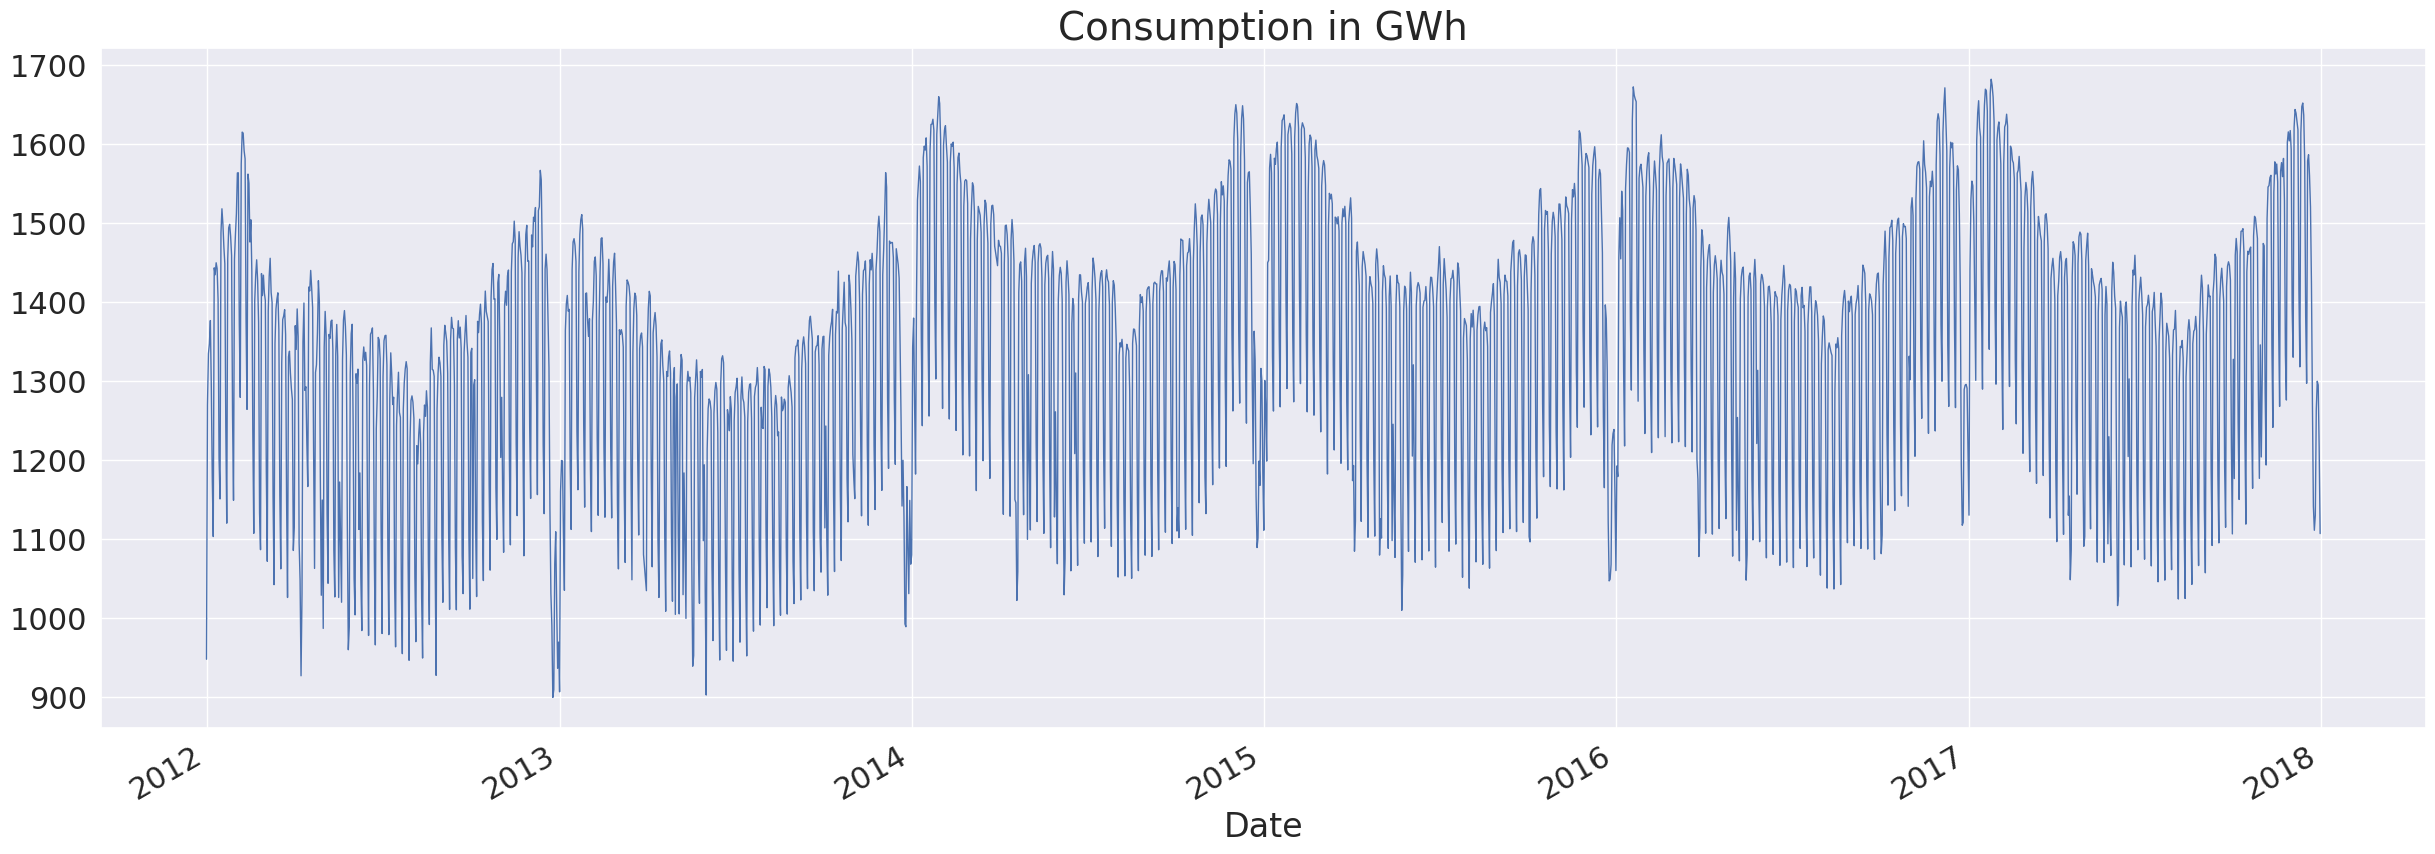

In [22]:
# Plot für den Stromverbrauch

# Linienplot
consumption_plot = data['Consumption'].plot(linewidth=1, title='Consumption in GWh');

In [23]:
# Plot exportieren funktioniert mit Plotname.figure.savefig()
# Speichern der Plots
consumption_plot.figure.savefig('./data/consumption-plot.pdf')
consumption_plot.figure.savefig('./data/consumption-plot.png', dpi=consumption_plot.figure.dpi)

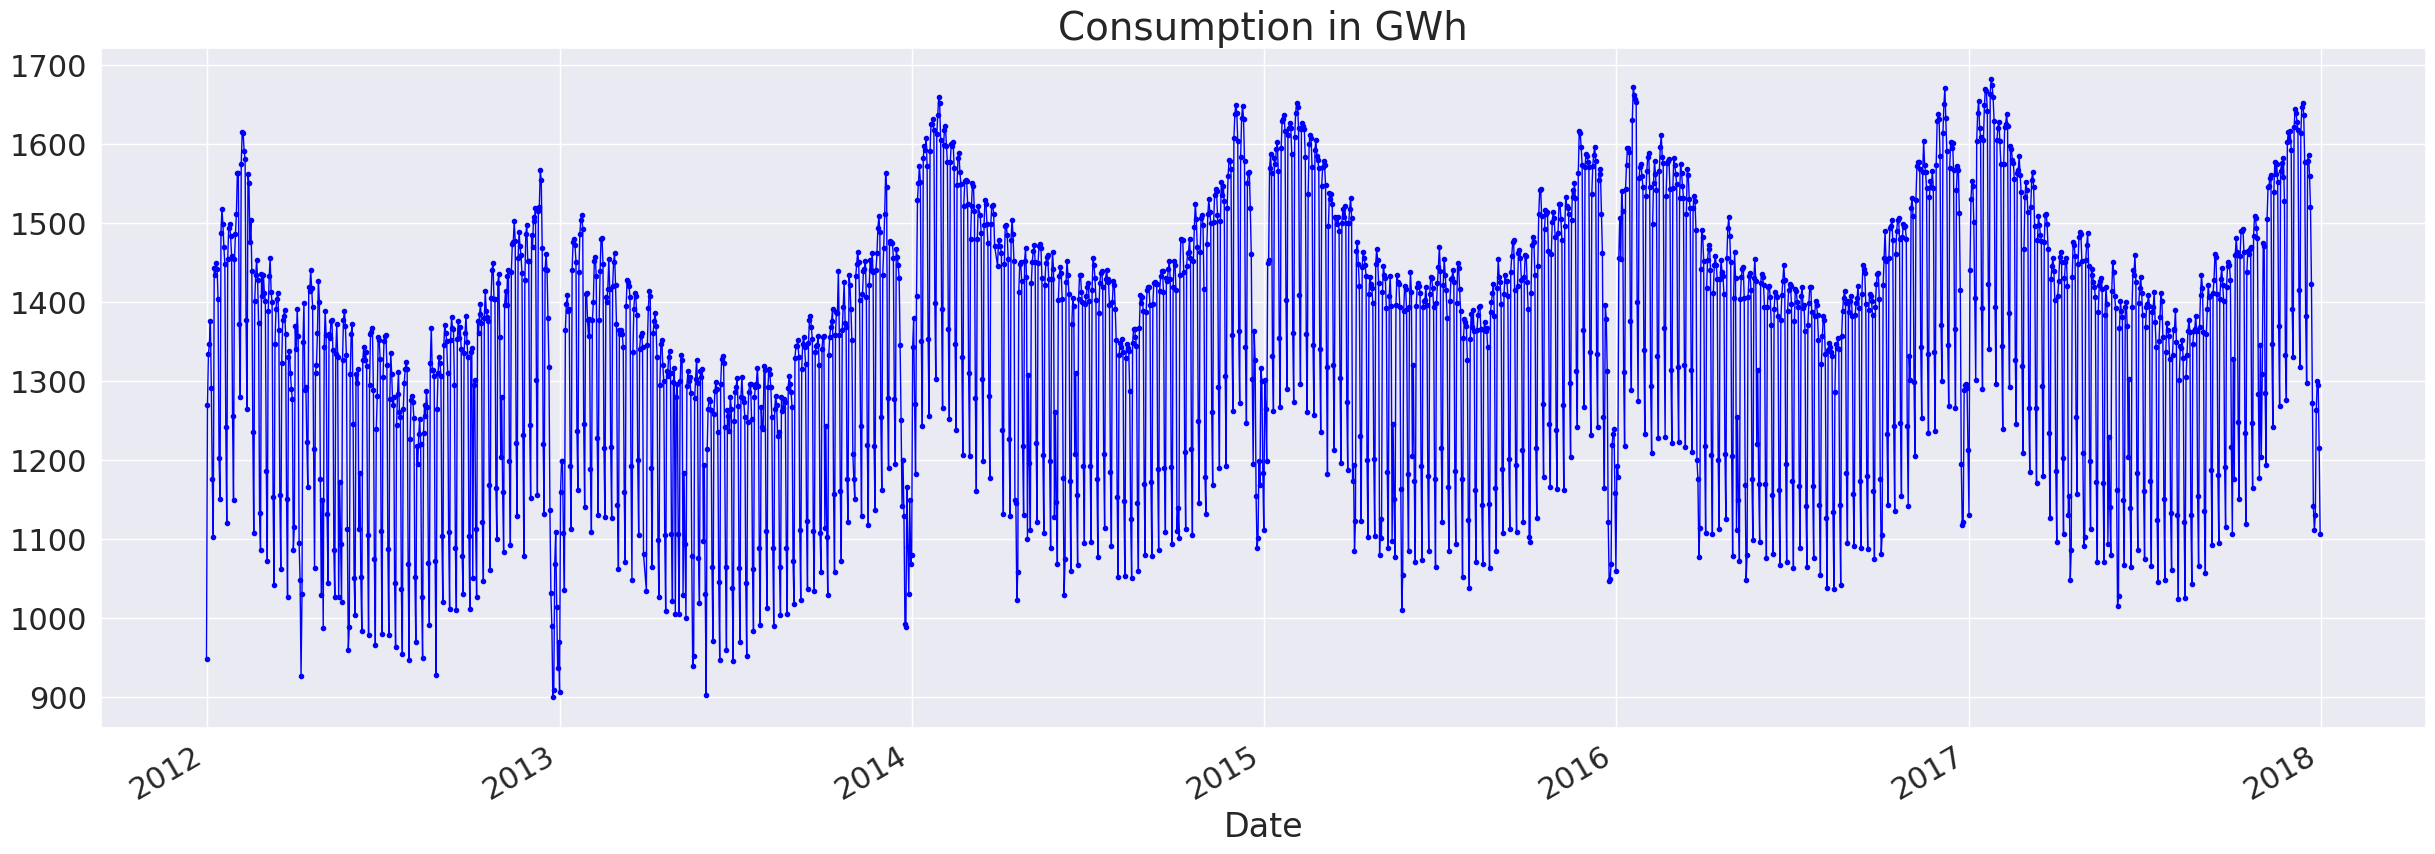

In [24]:
# Linienplot mit speziell definiertem Marker
consumption_plot = data['Consumption'].plot(linewidth=1, marker='.', title='Consumption in GWh', colormap='winter');  
plt.show()

# Was passiert wenn Sie marker='o' oder marker='x' setzen?
# Auf das Diagramm werden die Datenpunkte mit einem Kreuz oder einem Kreis markiert.
# Es wird weniger deutlich, dass es sich um einen Linienplot handelt.

Eine Übersicht weiterer Marker gibt es hier:
https://matplotlib.org/3.1.1/api/markers_api.html 

In [25]:
# Plot mit Marker ohne Linie
data['Consumption'].plot(linestyle='', marker='o', title='Consumption in GWh');

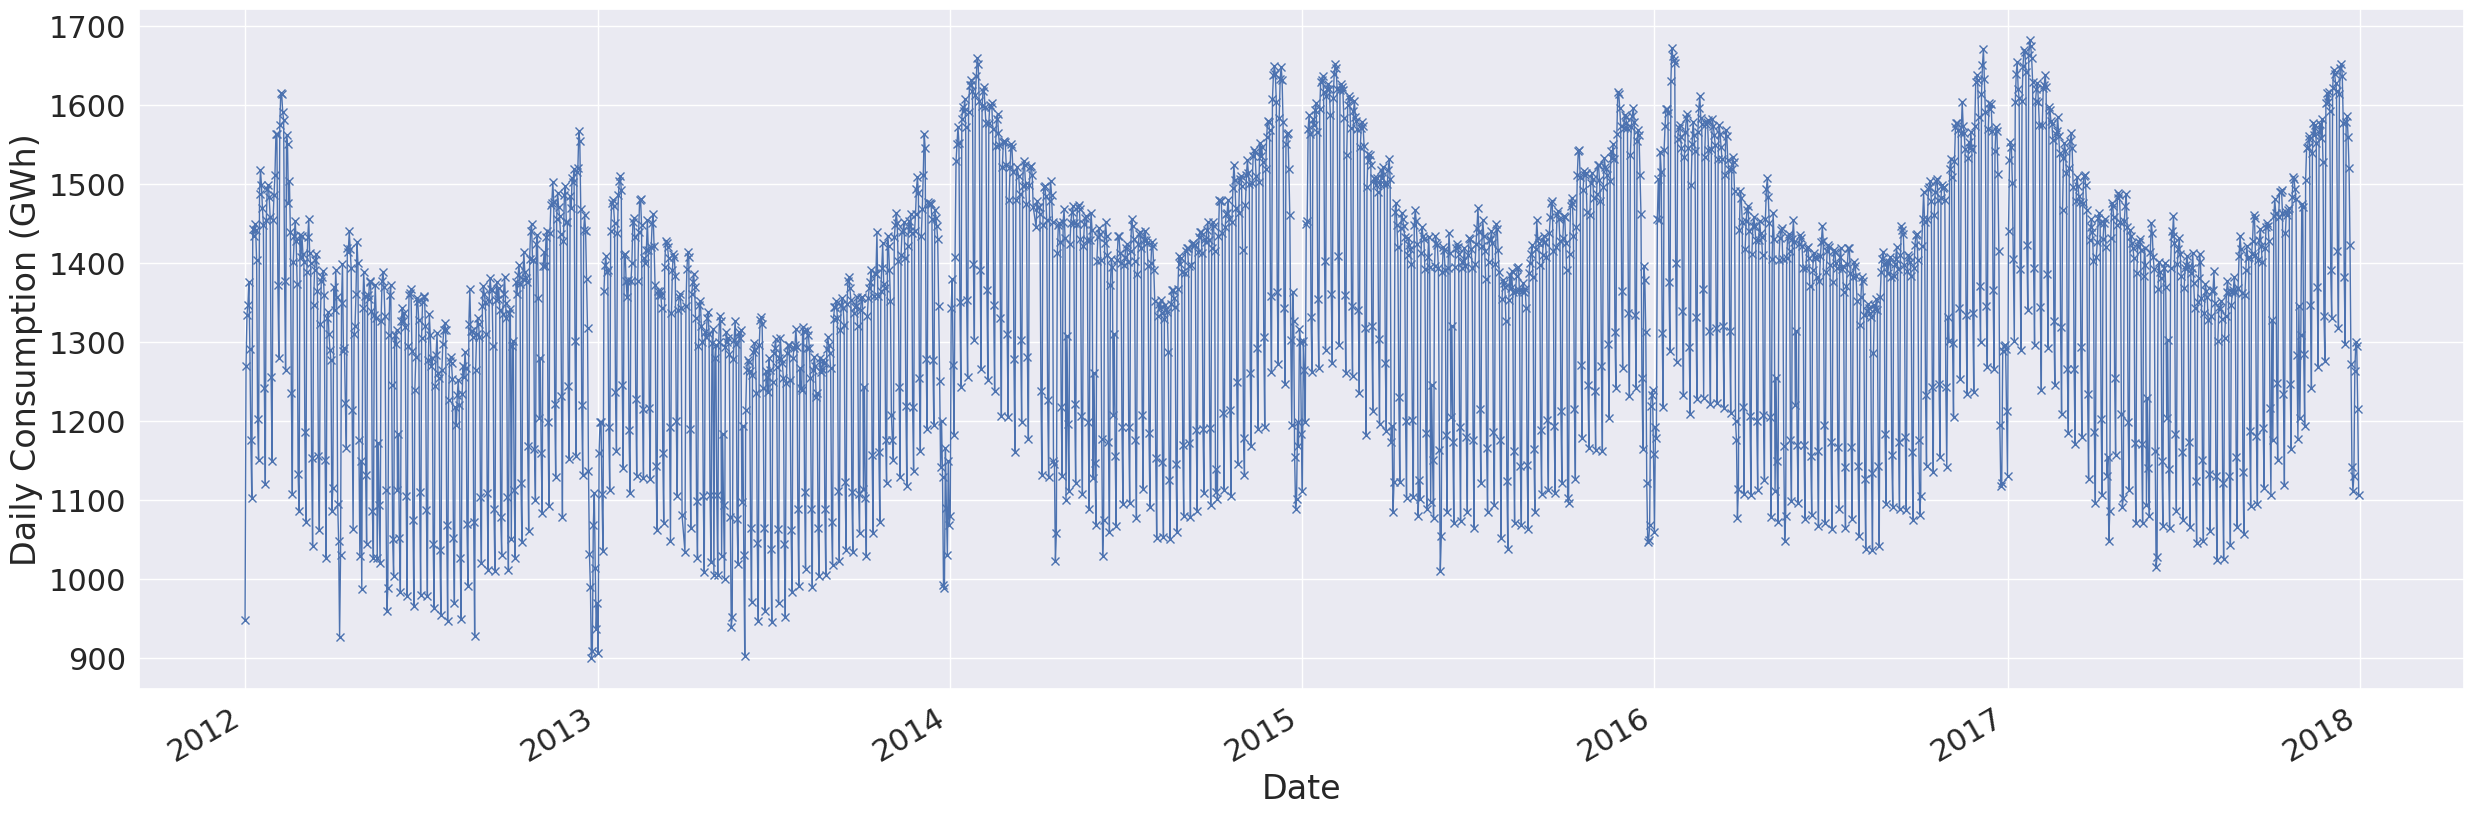

In [26]:
# Achsenbeschriftung des Plots einstellen
ax = data['Consumption'].plot(linewidth=1, marker='x');
ax.set_ylabel('Daily Consumption (GWh)');

In [27]:
# Aufgabe: Erstellen Sie einen Linienplot des Stromverbrauchs im Jahr 2016
# Fügen Sie eine geeignete Achsenbeschriftung für die y-Achse hinzu
ax = data['Consumption'].loc['2016'].plot(linewidth=1, marker='.', title='2016 Consumption in GWh');

In [28]:
# Aufgabe: Plotten Sie die Stromproduktion aus Wind- und Solarenergie für das Jahr 2017 in einem Graphen
ax = data[['Wind','Solar']].loc['2017'].plot(linewidth=1, marker='.', title='2017 Wind and Solar Production in GWh');

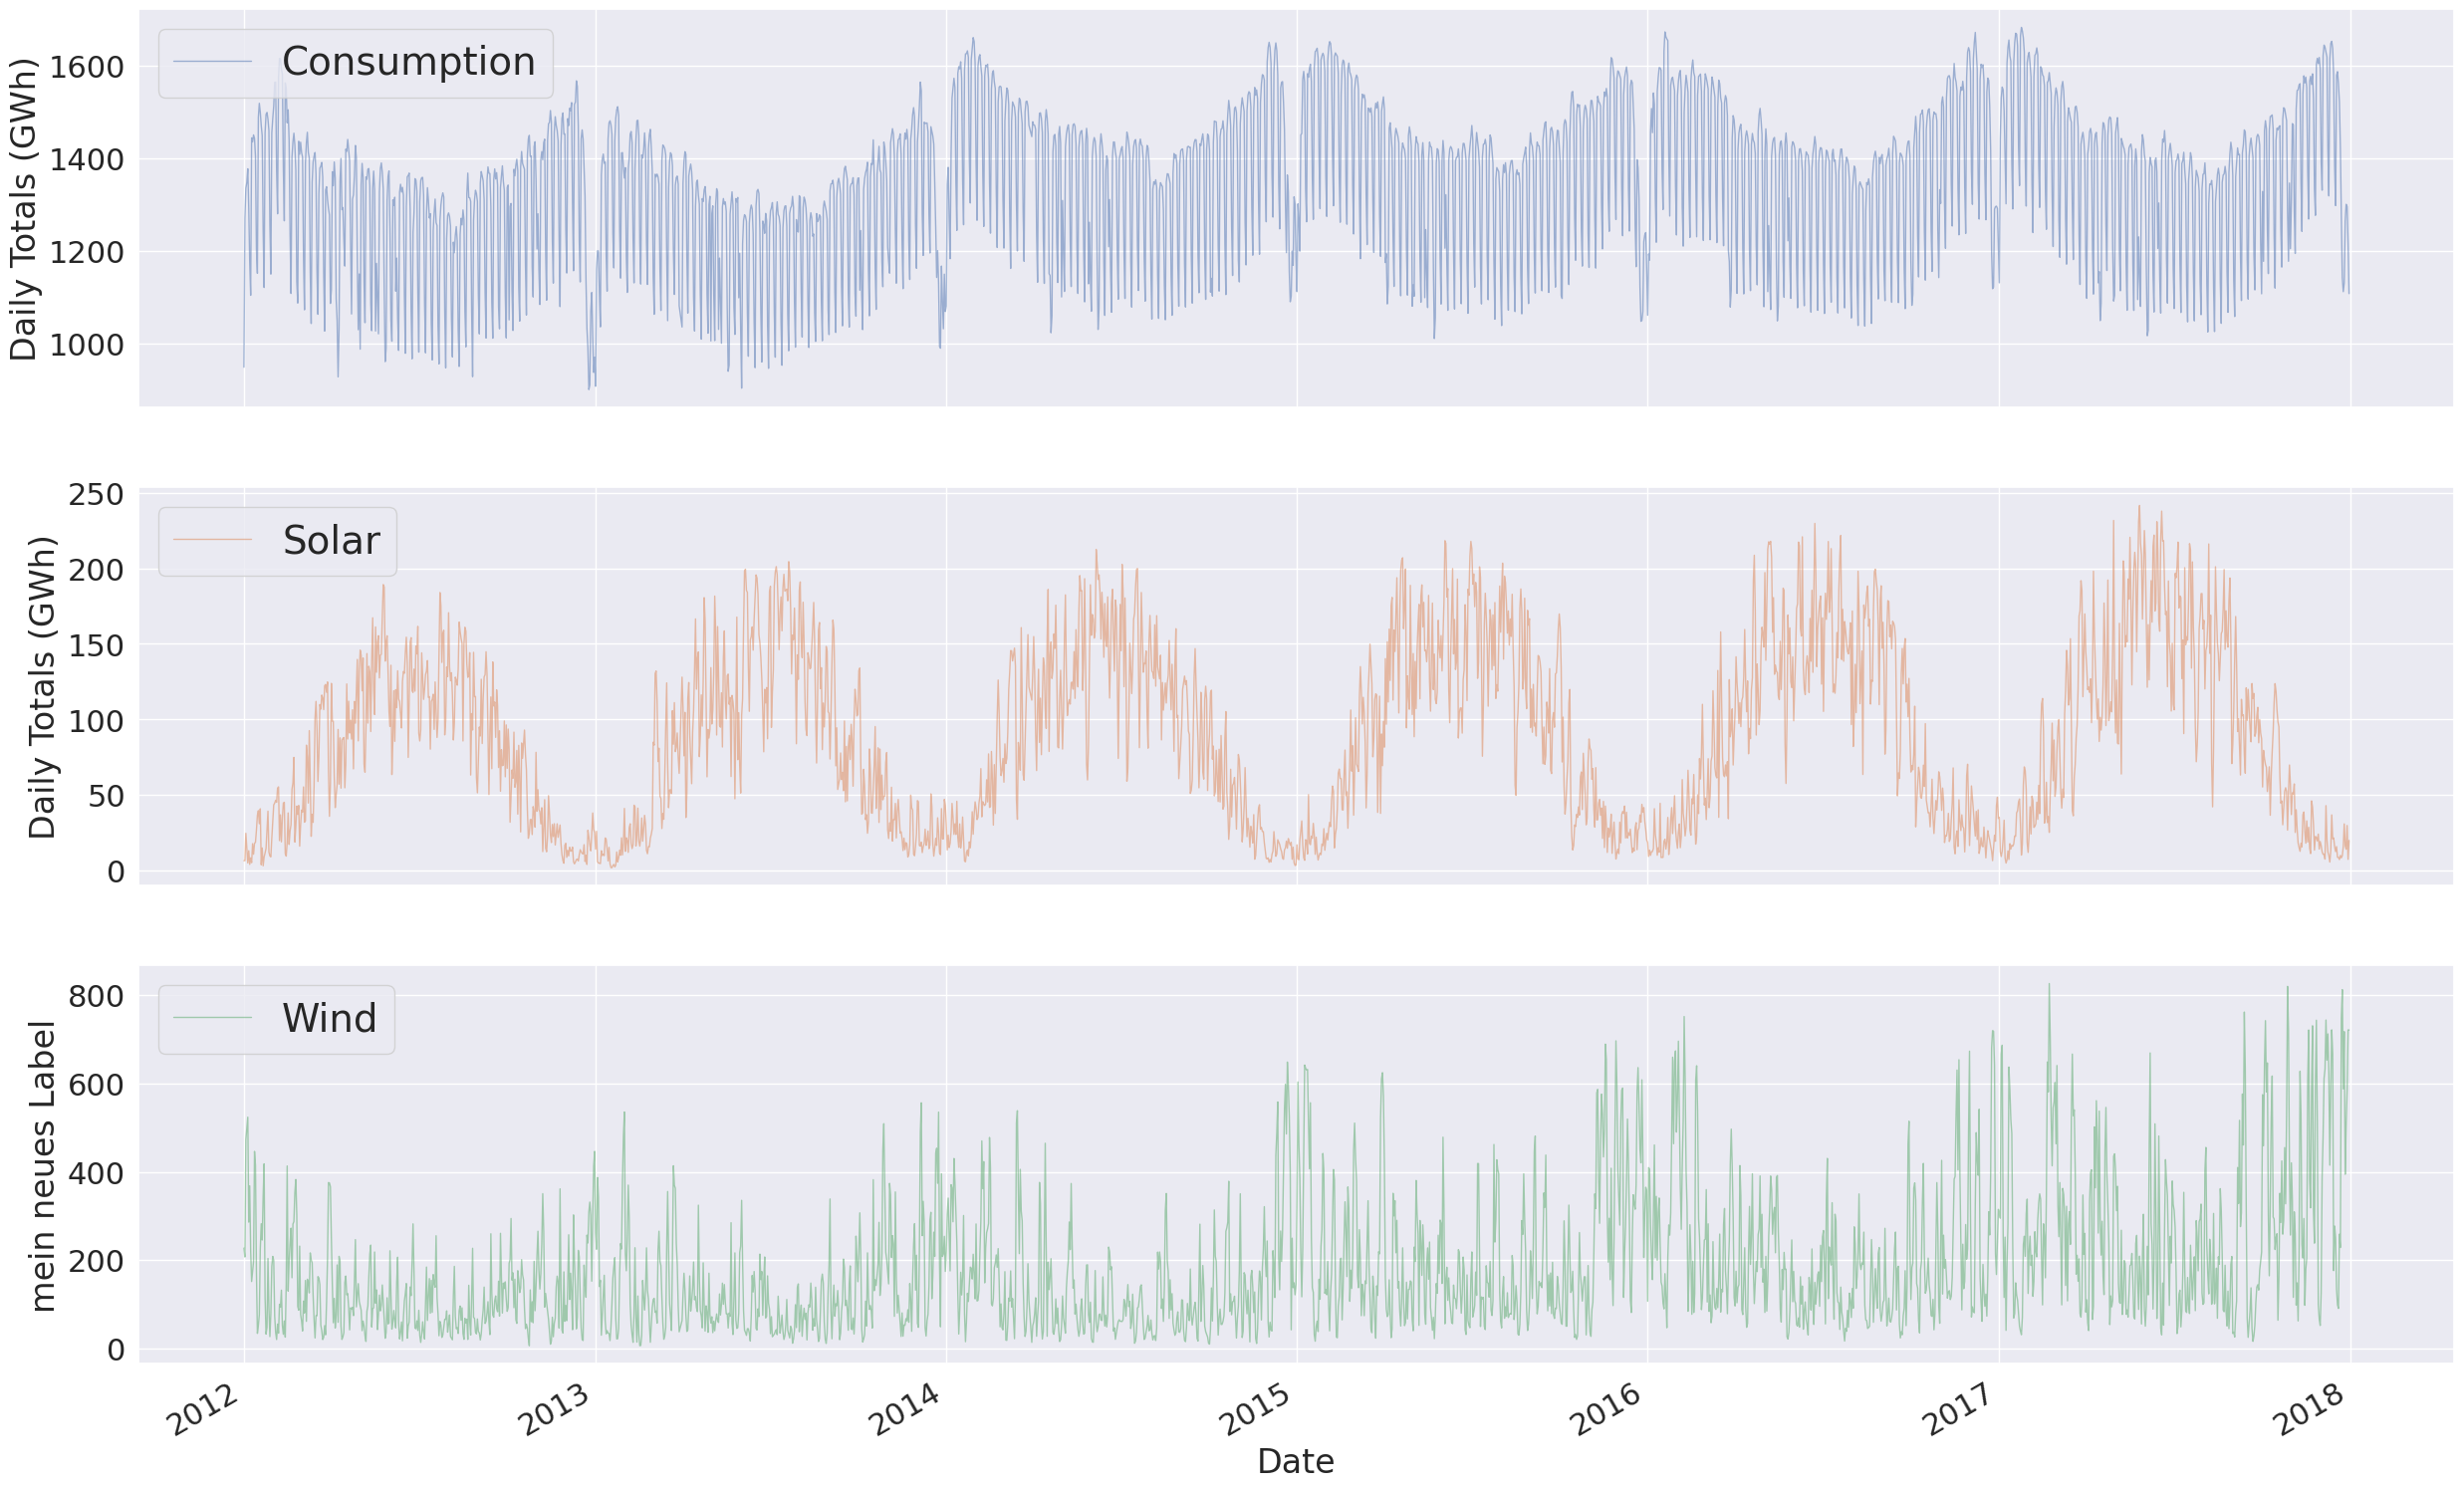

In [29]:
# Wir wollen nun die Verläufe für Verbrauch, Produktion aus Sonne, Produktion aus Wind untereinander plotten. 
# Das funktioniert so:

cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(alpha=0.5, linewidth=1, figsize=(30, 20), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
    ax.legend(loc="upper left")
    
axes[2].set_ylabel('mein neues Label');

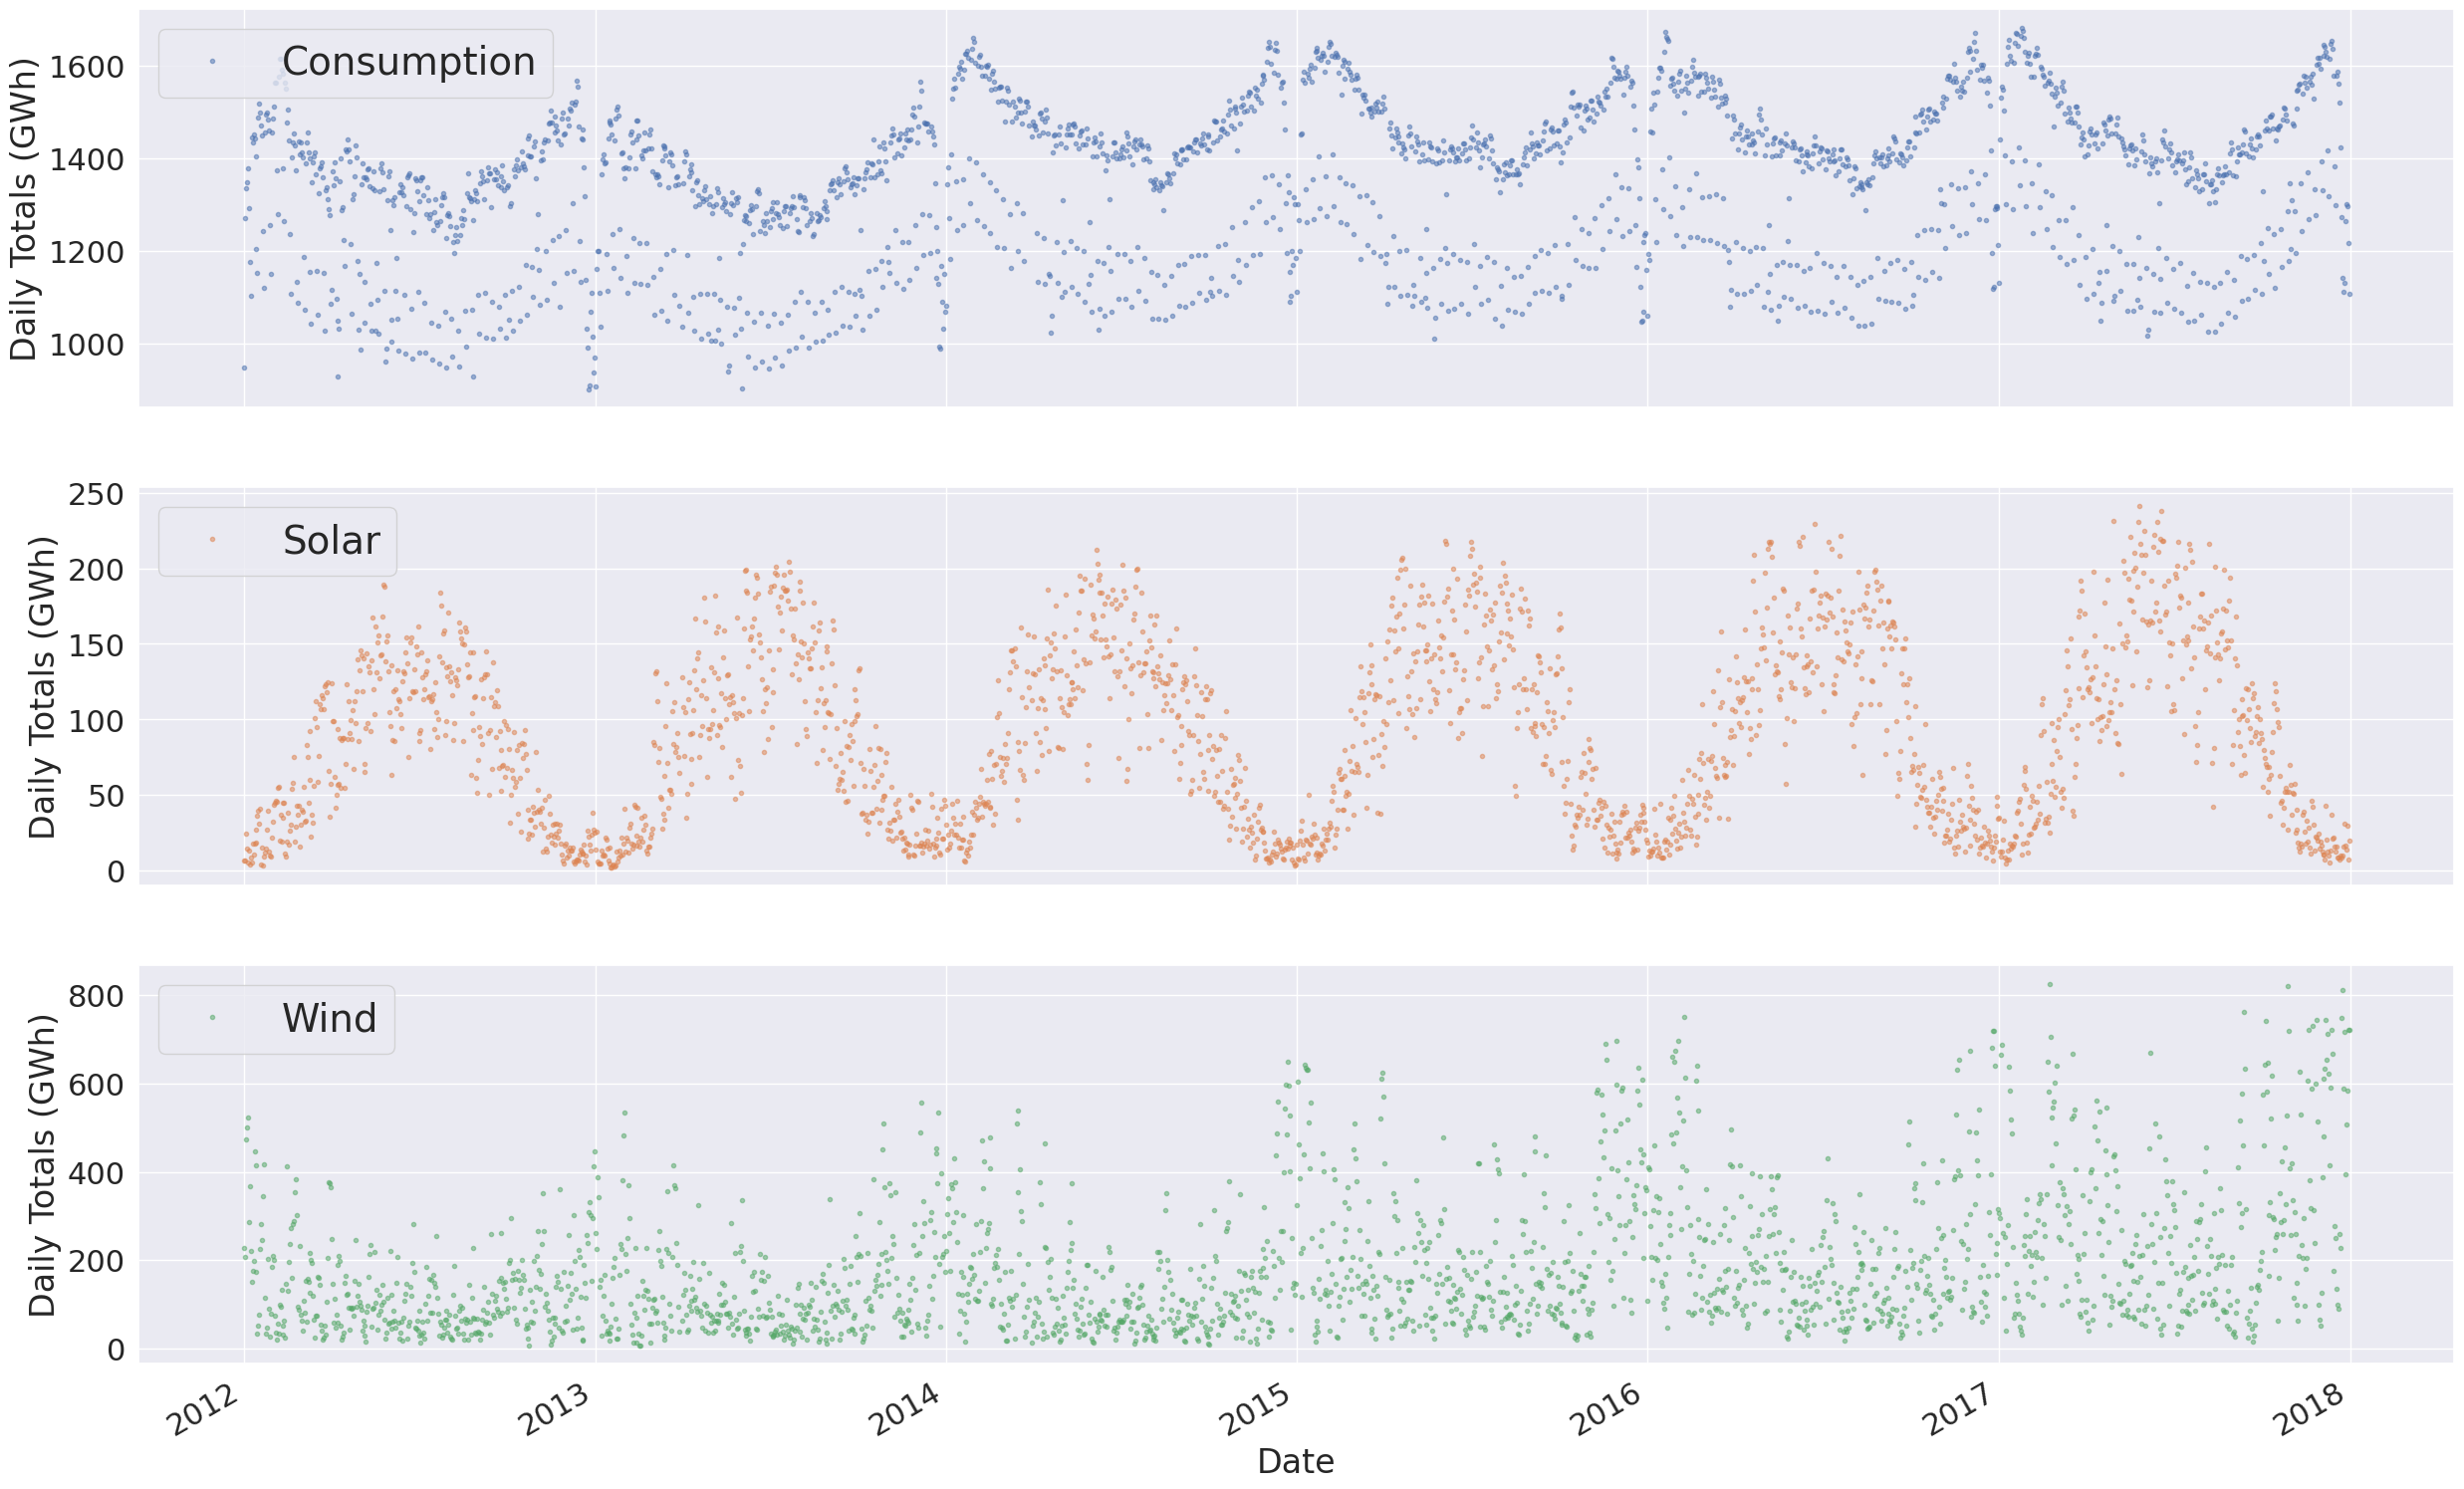

In [30]:
# Achtung: ein Linienplot kann den Eindruck verfälschen!
# Wir plotten nochmal mit Punkten als Marker und ohne Linie

axes = data[cols_plot].plot(marker='.',alpha=0.5, linestyle='', figsize=(30, 20), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
    ax.legend(loc="upper left")

*Welche interessanten Muster können wir hier schon jetzt erkennen?*

Antwort:
Beim ersten Diagramm kann man deutlich den Verbrauch am Wochenende und den Verbrauch während der Arbeitswoche unterscheiden.

Die von der Sonne erzeugte erneuerbare Energie ist am höchsten in der Mitte des Jahres (zwischen Mai und August) und am niedrigsten im Winter (Dezember bis Februar).

Windenergie ist eher konstant mit mehr Ausreißern im Winter.

*Allgemein lässt sich bei den Diagrammen Saisonalität erkennen.*

## Saisonalität 
- Alle drei Zeitreihen weisen Periodizitäten auf, bei Zeitreihen auch Saisonalität genannt.
- Saisonalität: Ein Muster wiederholt sich in regelmäßigen Zeitintervallen
- Auf der jährlichen Zeitskala oszillieren Stromverbrauch, Solarenergie und Windenergie aufgrund der Jahreszeiten
- Ist auch Saisonalität auf anderen Zeitskalen zu beobachten?
- Wir untersuchen den Stromverbrauch hinsichtlich Saisonalität auf einer monatlichen Zeitskala

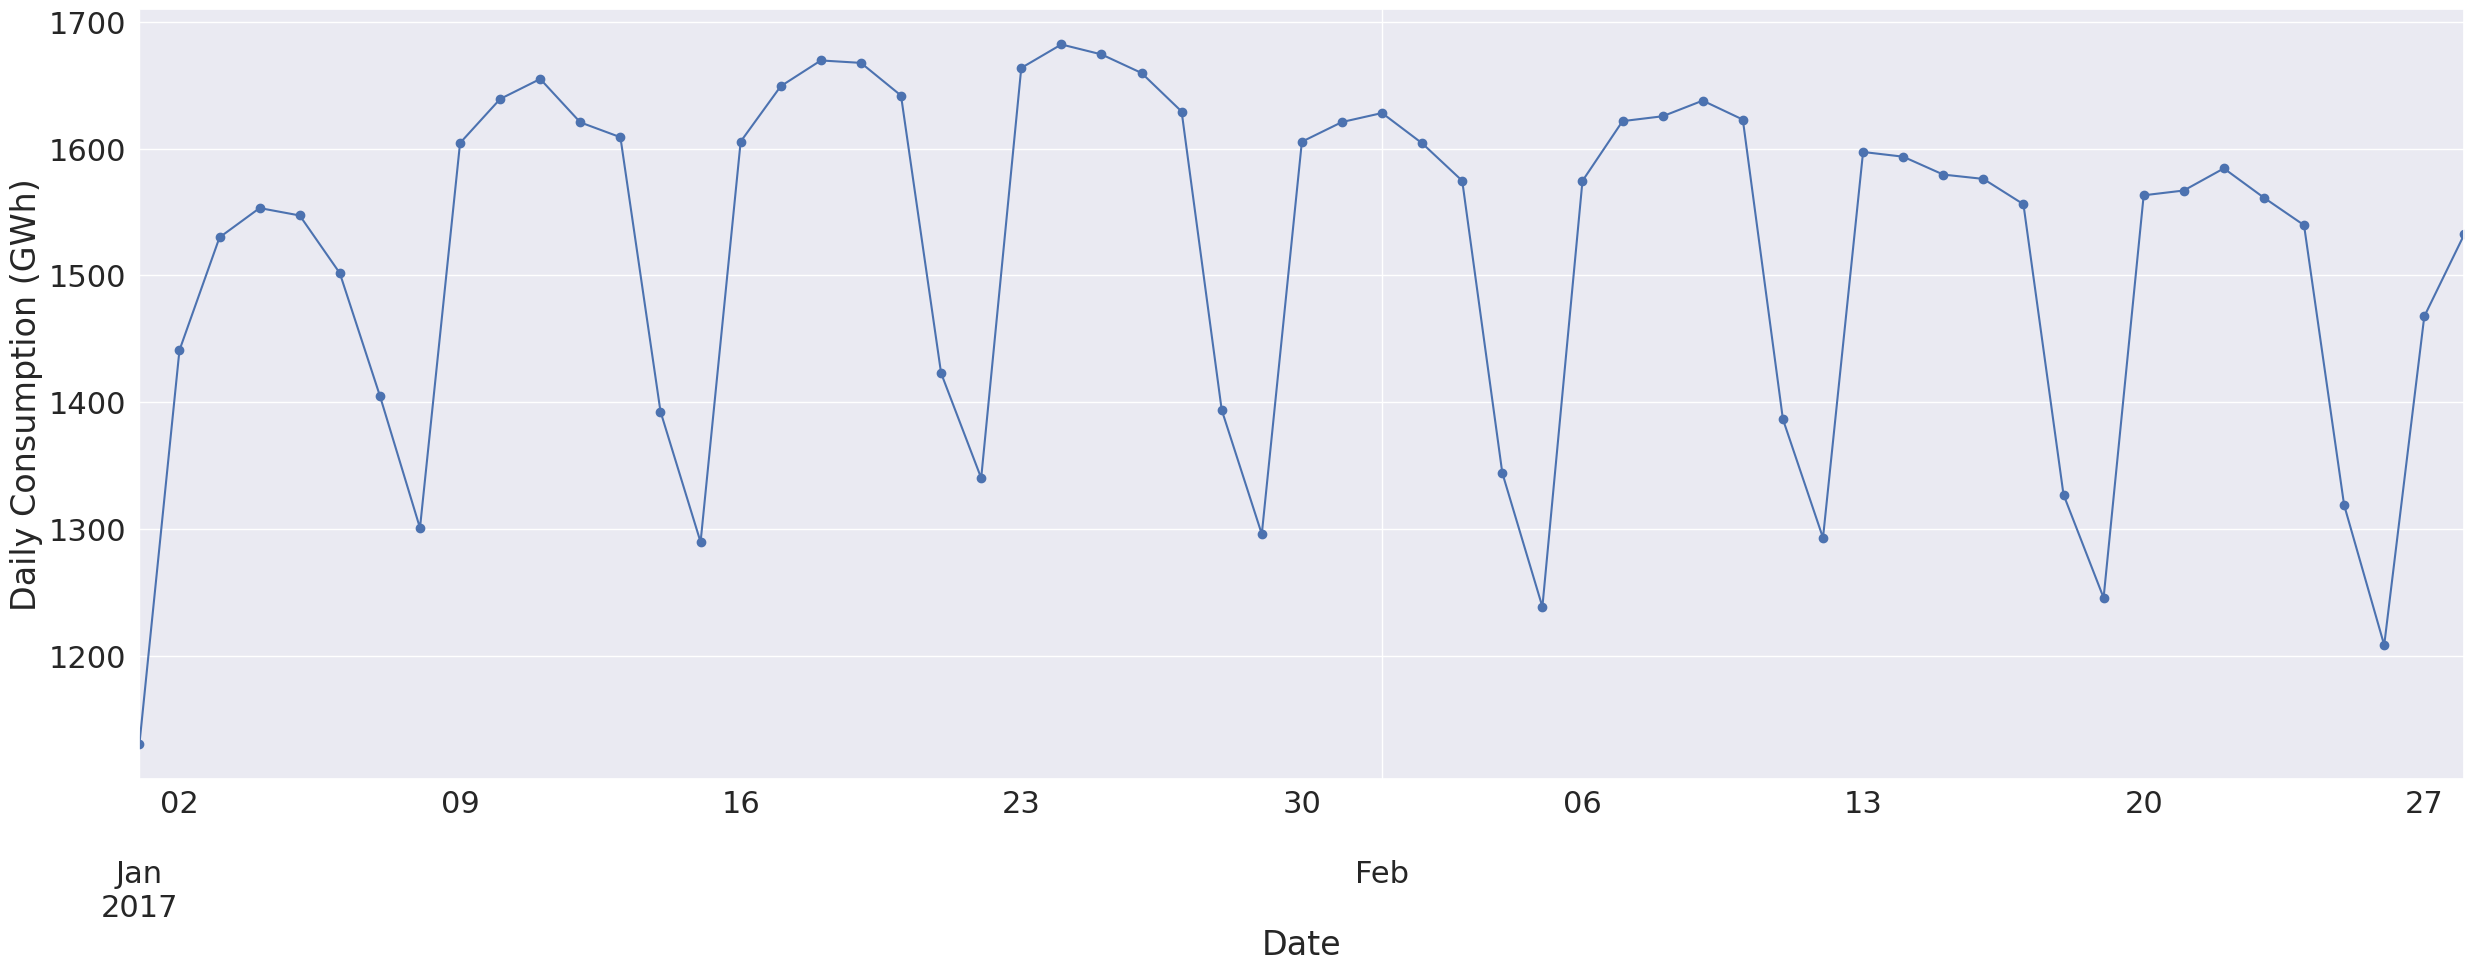

In [31]:
# Plotten Sie den Stromverbrauch für Januar und Februar 2017
ax = data.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

### Auswertung
- Montage sind der 02.01., 09.01, 16.01,...
- Es lässt sich erkennen, dass Anfang und Mitte der Woche mehr Verbrauch registriert wird. Dies ist eine zurückkehrende Tendenz, die auf der Arbeitswoche zurückzuführen ist.

## Saisonalität mit Boxplots untersuchen

Ziel: Saisonalität näher untersuchen. Das funktioniert mit Boxplots.

In [32]:
# Als erstes fügen wir den Daten wieder eine Spalte mit dem Monat hinzu:
data['Month'] = data.index.month
data.head()

Consumption     Wind   Solar  Wind+Solar  Weekend Month Name  \
Date                                                                       
2012-01-01      948.128  227.465   6.587     234.052     True    January   
2012-01-02     1269.581  207.327   6.574     213.901    False    January   
2012-01-03     1334.745  473.468  24.679     498.147    False    January   
2012-01-04     1347.136  499.804  14.681     514.485    False    January   
2012-01-05     1376.658  523.851   5.071     528.922    False    January   

            Month  
Date               
2012-01-01      1  
2012-01-02      1  
2012-01-03      1  
2012-01-04      1  
2012-01-05      1

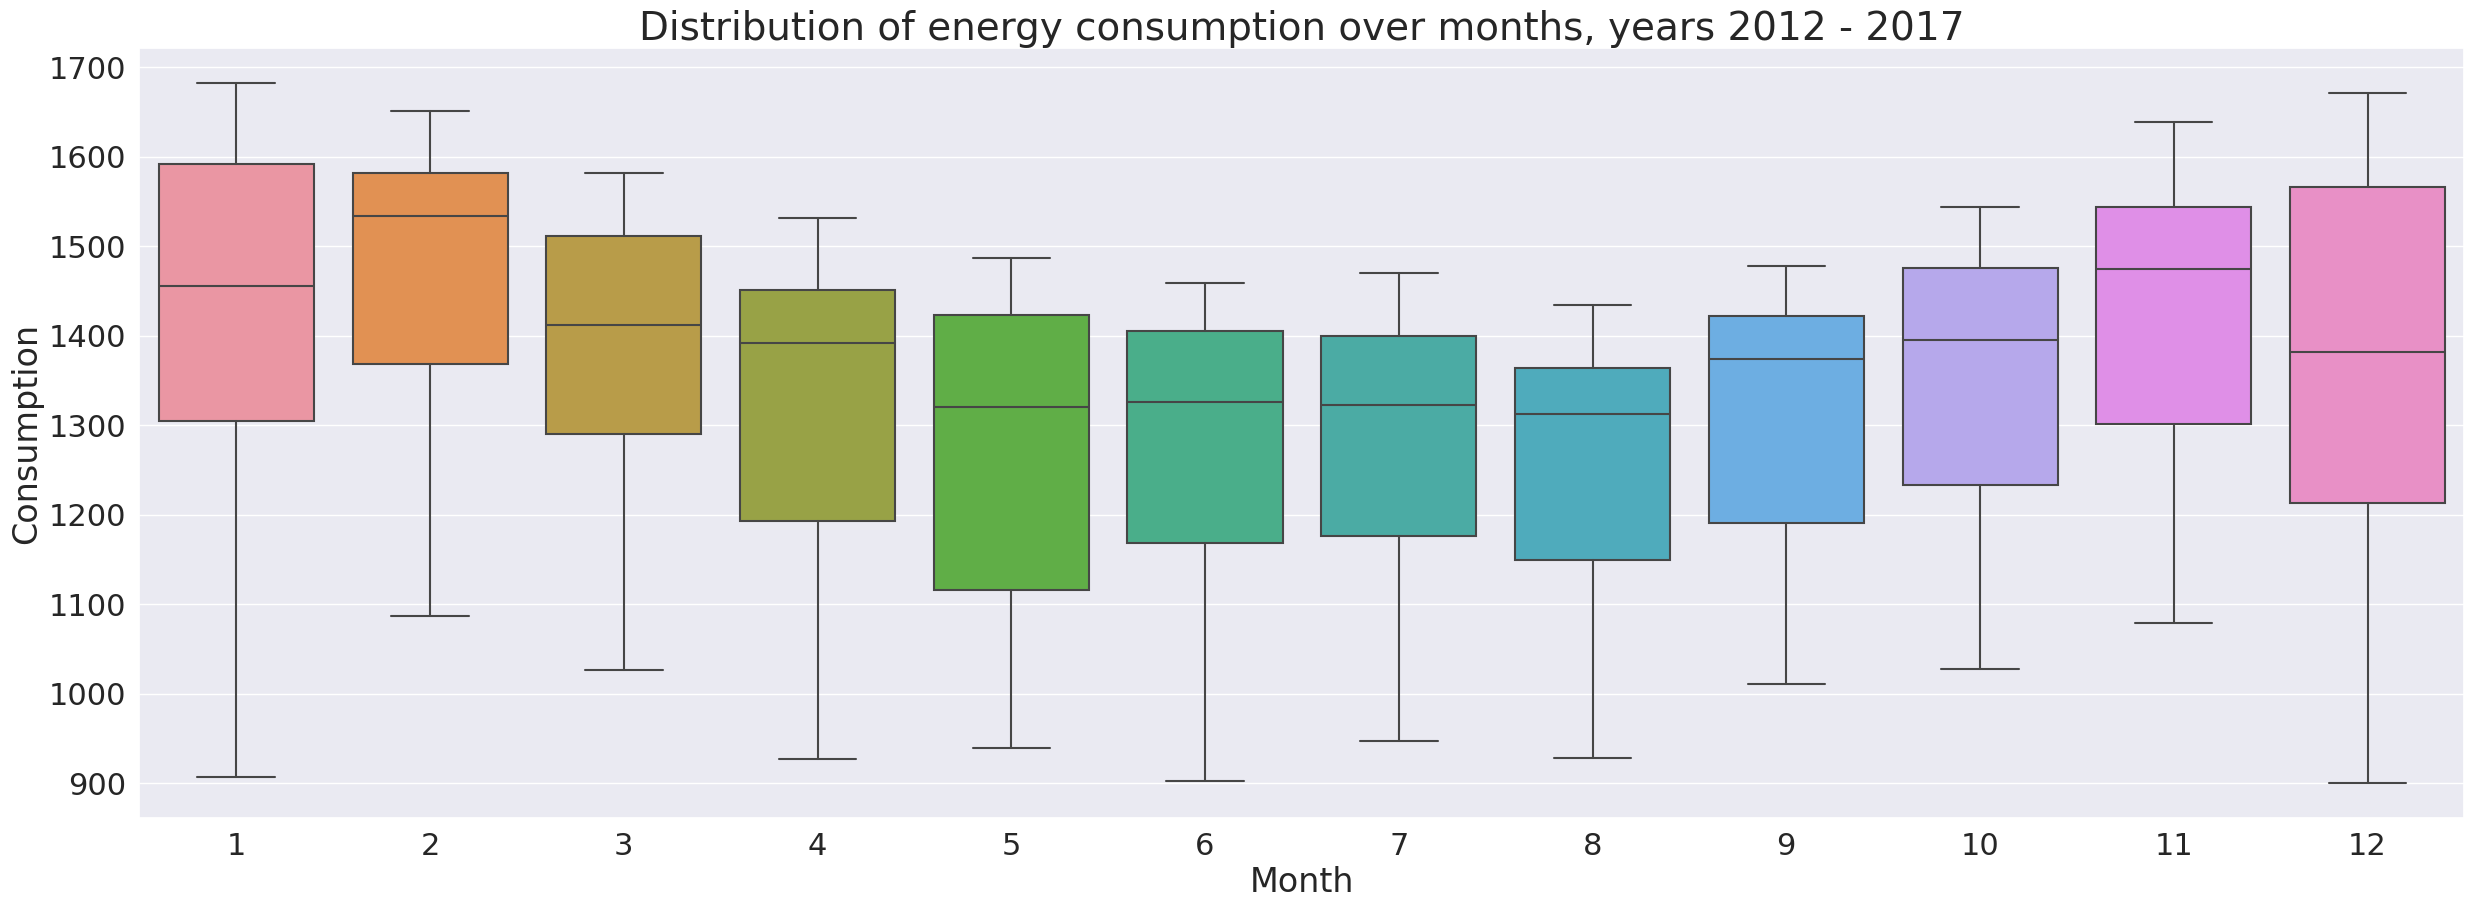

In [33]:
# Ein Boxplot kann mit der boxplot() Funktion von seaborn erstellt werden.
# wir gruppieren damit die Daten hinsichtlich unterschiedlicher Zeiträume 
# und lassen uns die Verteilungen für jede Gruppe anzeigen
# zunächst gruppieren wir die Daten monatsweise, um die jährliche Saisonalität zu untersuchen

mein_boxplot = sns.boxplot(data=data, x='Month', y='Consumption').set_title('Distribution of energy consumption over months, years 2012 - 2017')

# Aufgabe: Speichern Sie sich den Graphen mit den Boxplots als pdf
mein_boxplot.figure.savefig('./data/distribution-boxplot.pdf')

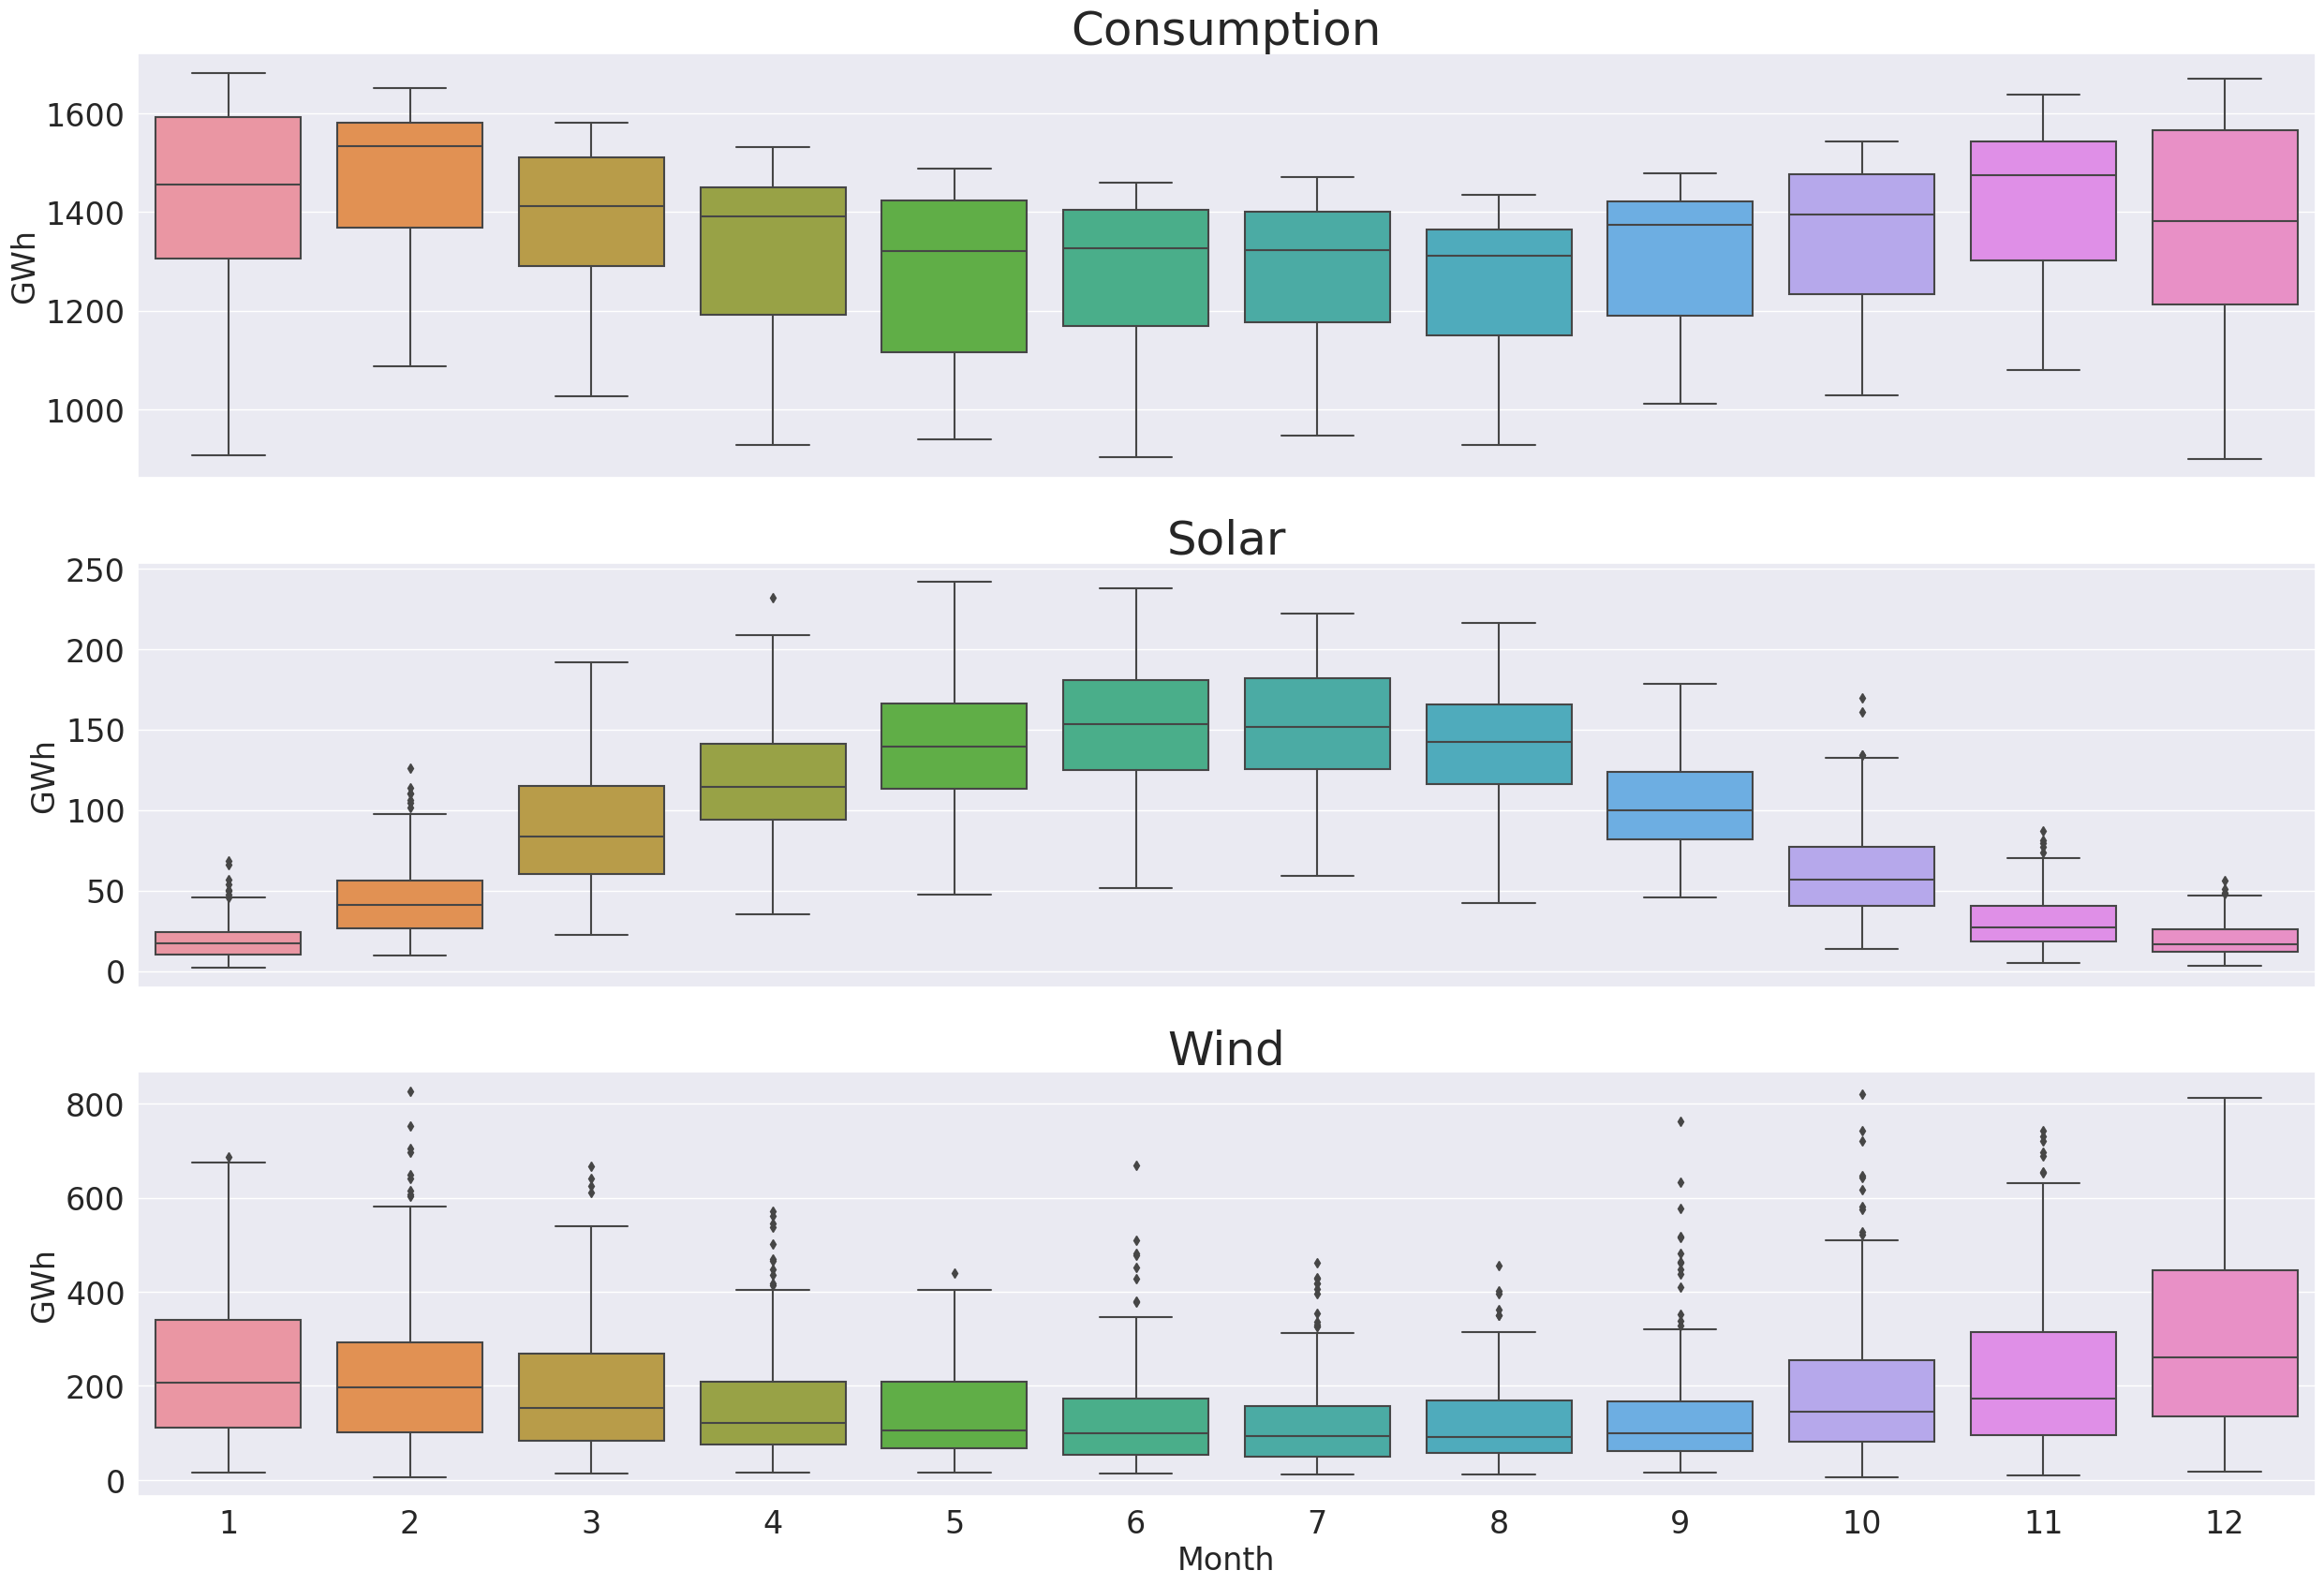

In [34]:
# Wir können auch mehrere Boxplots für die einzelnen Spalten untereinander anzeigen lassen.

fig, axes = plt.subplots(3, 1, figsize=(30, 20), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    #ax.set(ylim=(0, 1800))
    ax.set_ylabel('GWh', fontsize=24)
    ax.set_title(name, fontsize=36)
    ax.tick_params(labelsize=24) #Größe der Zahlenbeschriftungen der Achsen einstellen
# Automatisch generiertes Label der x-Achse entfernen für alle Subplots außer dem untersten.
    if ax != axes[-1]:
        ax.set_xlabel('')
        
#Abstand zwischen den Subplots einstellen
plt.subplots_adjust(hspace = 0.2)

# Plot speichern
fig.savefig('./data/several_boxplots.pdf')

## Interpretation der Boxplots
### Welche Bestandteile hat ein Boxplot?
- IQR - Interquartile Range
- Median (Linie in IQR)
- Q1 und Q3, jeweils 25% und 75% Grenze von IQR
- Whiskers - (Q1 - 1.5 IQR) & (Q3 + 1.5 IQR)
- Punkte außerhalb der Whiskers sind Ausreißer. 

## Analyseergebnisse Boxplots
### Welche Erkenntnisse lassen sich aus den Boxplots gewinnen?
- Tendenzen der Verbrauch und Erzeugung von erneuerbaren Energien. Verbrauch und Erzeugung sind natürlich umgekehrt proportional zueinander.

- Im Sommer und nah der wärmeren Monaten ist der Verbrauch geringer und die Erzeugung von Energie durch die Sonne höher. Die Erzeugung von Windenergie und der Verbrauch sind proportional zueinander, wobei es viele Ausreißer über das Norm bei `Wind` gibt. 

## Grundlagen Boxplot
### Was wird hier überhaupt gemacht? 
- Von den vorhandenen Jahren 2012 bis 2017 werden jeweils für einen Monat die Tagesverbräuche analysiert. Wie war der Tagesverbrauch im Januar verteilt? Wie im Februar?

- Die Box des Boxplots entspricht dem Bereich, in dem die mittleren 50 % der Daten liegen. D.h. 25% der Werte sind höher und 25% der Werte sind niedriger.

- Die Länge der Box entspricht dem Interquartilsabstand (IQR). Dieser ist ein Maß für die Streuung der Daten. Z.B. streut die Produktion von Solarenergie im Winter weniger als im Sommer. "Im Sommer gibt es gute und schlechte Tage, im Winter hauptsächlich schlechte".

- Der Median wird durch die gerade Linie in der Box dargestellt. Er teilt das Diagramm in zwei Bereiche: die unteren 50% der Werte und die oberen 50% der Werte.

- Durch die Lage des Medians innerhalb der Box bekommt man einen Eindruck von der Schiefe der den Daten zugrunde liegenden Verteilung. Ist der Median im linken Teil der Box, so ist die Verteilung rechtsschief, und umgekehrt.

- Die Antennen/Whisker stellen die außerhalb der Box liegenden Werte dar. Ihre Länge ist maximal 1.5 mal so lang wie die Länge der Box (IQR). 

- Punkte außerhalb der Whisker (Werte, die unter oder über 1.5 x IQR liegen) stellen Ausreißer dar.